# Import libraries

In [1]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

# Labelme polygons to mask

From labelme polygons to mask images for the semantic segmentation of the road

In [2]:
def plot_image(img, figsize_in_inches=(5,5)):
    fig, ax = plt.subplots(figsize=figsize_in_inches)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
def plot_images(imgs, figsize_in_inches=(5,5)):
    fig, axs = plt.subplots(1, len(imgs), figsize=figsize_in_inches)
    for col, img in enumerate(imgs):
        axs[col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


def plot_img(image_bgr) : 
    # Convert BGR image to RGB (required by Matplotlib for correct display)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Plot the image using pyplot
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

In [3]:
def get_binary_mask(jsonfile_path, img_path) :
    # Read the JSON file
    with open(jsonfile_path, 'r') as file:
        json_data = json.load(file)

    # Load the image
    image = cv2.imread(img_path)

    # Create an empty mask
    mask = np.zeros_like(image[:, :, 0])

    # Iterate through the polygons
    polygons = json_data['shapes']
    for polygon in polygons:
        points = polygon['points']
        points = np.array(points, dtype=np.int32)

        # Draw the polygon on the mask
        cv2.fillPoly(mask, [points], 255)
    return mask

In [4]:
json_path = "/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Industrieel/UGent_2022-2023/VENTOUX_v1.0/2020_KBK_frame1800.json"
img_path = "/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Industrieel/UGent_2022-2023/VENTOUX_v1.0/2020_KBK_frame1800.jpg"
mask = get_binary_mask(json_path, img_path)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

In [5]:
import os
import shutil
name = "instance_segmentation_v5"
dir_path = os.path.join(os.getcwd(), name, "dataset")
print(dir_path)
output_dir_name = name + "dataset"
dataset_path = os.path.join(os.getcwd(), output_dir_name)
images_path = os.path.join(dataset_path, "images")
masks_path = os.path.join(dataset_path, "masks")

# Clear the directory if it already exists
if os.path.exists(dataset_path):
    shutil.rmtree(dataset_path)

if os.path.exists(images_path):
    shutil.rmtree(images_path)

if os.path.exists(masks_path):
    shutil.rmtree(masks_path)

# Create the directory
os.makedirs(dataset_path)
os.makedirs(images_path)
os.makedirs(masks_path)

count = 0

for img_file in os.listdir(dir_path):
    if img_file == ".DS_Store" :
        continue
    base_filename = img_file.split(".")[0]
    extension = img_file.split(".")[1]
    print(base_filename)
    if extension == "jpg" :
        json_filename = base_filename + '.json'
        json_path = os.path.join(dir_path, json_filename)
        img_path = os.path.join(dir_path, img_file)
        if os.path.isfile(json_path) :
            count += 1
            mask = get_binary_mask(json_path, img_path)
            img = cv2.imread(img_path)
            img_path = os.path.join(images_path, base_filename) + ".jpg"
            print(img_path)
            mask_path = os.path.join(masks_path, base_filename) + ".jpg"
            cv2.imwrite(img_path, img)
            cv2.imwrite(mask_path, mask)

print(f"{count} images/masks in dataset")

/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Industrieel/UGent_2022-2023/VENTOUX_v1.0/03_postprocessing/instance_segmentation_v5/dataset


FileNotFoundError: [Errno 2] No such file or directory: '/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Industrieel/UGent_2022-2023/VENTOUX_v1.0/03_postprocessing/instance_segmentation_v5/dataset'

In [4]:
predicted_masks_dir = "/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/predicted_masks"
img_path = os.path.join(predicted_masks_dir, "2020_KBK_15.jpg")
binary_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Find the indices of the white pixels
white_pixel_indices = np.where(binary_img == 255)
print(white_pixel_indices)


# Extract x and y coordinates of the white pixels
x = white_pixel_indices[1]
y = white_pixel_indices[0]

a, b, c, d = np.polyfit(x, y, 3)

# Now, calculating the y-axis values against x-values according to
# the parameters theta0, theta1 and theta2
# y_line = a * pow(x_white, 2) + b * pow(x_white, 1) + c
y_line =a * pow(x, 3) + b * pow(x, 2) + c * pow(x, 1) + d

# Plotting the data points and the best fit 2nd degree curve
plt.scatter(x, y)
plt.plot(x, y_line, 'r')
plt.title('2nd degree best fit curve using numpy.polyfit()')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

(array([], dtype=int64),)


/var/folders/z8/jk8wslr51fb7ltc_q884vp7h0000gn/T/ipykernel_20585/1923145789.py:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  white_pixel_indices = np.where(binary_img == 255)
[ WARN:0@23.880] global loadsave.cpp:248 findDecoder imread_('/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/predicted_masks/2020_KBK_15.jpg'): can't open/read file: check file path/integrity


IndexError: tuple index out of range

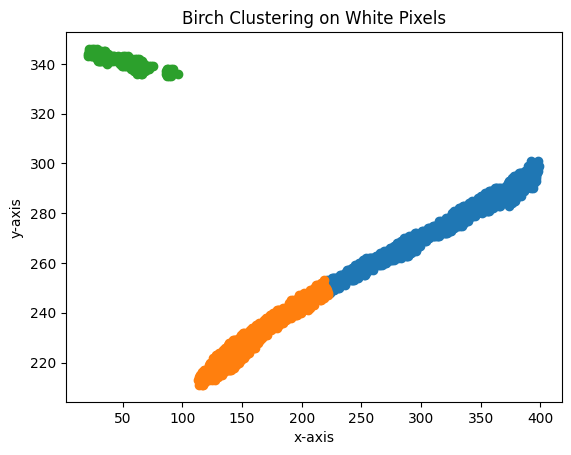

In [5]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot

# Extract x and y coordinates of the white pixels
x_white = white_pixel_indices[1].reshape(-1, 1)
y_white = white_pixel_indices[0].reshape(-1, 1)

# Combine the x and y coordinates into a single feature vector
X = np.hstack((x_white, y_white))

# Define the model
model = Birch(threshold=0.01, n_clusters=3)

# Fit the model
model.fit(X)

# Assign a cluster to each example
yhat = model.predict(X)

# Retrieve unique clusters
clusters = np.unique(yhat)

# Create scatter plot for samples from each cluster
for cluster in clusters:
    # Get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # Create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

# Show the plot
plt.title('Birch Clustering on White Pixels')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [7]:
import math 
from sklearn.cluster import KMeans, Birch
# from shapely.geometry import LineString, Polygon
import numpy as np
from sklearn.datasets import make_classification
from matplotlib import pyplot

Shape is (512, 512)
(array([220, 220, 220, ..., 506, 506, 506]), array([138, 139, 140, ..., 301, 302, 303]))
[[138]
 [139]
 [140]
 ...
 [301]
 [302]
 [303]]
[[138 220]
 [139 220]
 [140 220]
 ...
 [301 506]
 [302 506]
 [303 506]]
Length of X: 8160


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers: [[309.20953576 493.3161857 ]
 [480.27066001 380.85856905]
 [189.4295474  249.31853117]
 [293.38436745 299.5463336 ]
 [469.81471536 446.24865736]
 [392.37713841 344.26283048]]
[{0, 2}]
[{0, 2}, {1, 2}]
[{0, 2}, {1, 2}, {2, 3}]
[{0, 2}, {1, 2}, {2, 3}, {3, 5}]
[{0, 2}, {1, 2}, {2, 3}, {3, 5}, {2, 4}]
[{0, 2}, {1, 2}, {2, 3}, {3, 5}, {2, 4}, {2, 5}]


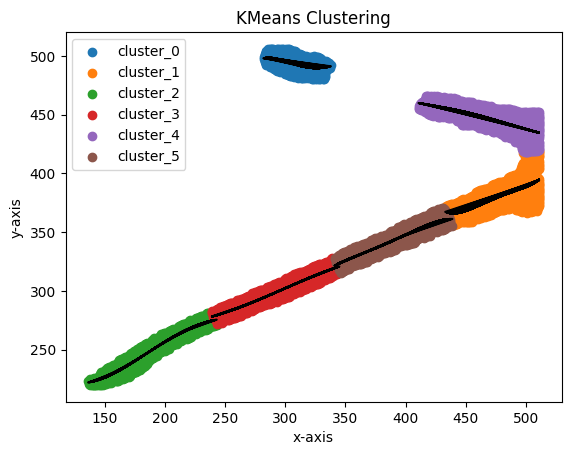

Length of X: 8160


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers: [[481.19363839 381.48939732]
 [294.52114924 300.0518755 ]
 [309.20953576 493.3161857 ]
 [394.08655332 345.03400309]
 [189.78032231 249.49363868]
 [469.48455285 446.500271  ]]
[{0, 4}]
[{0, 4}, {1, 4}]
[{0, 4}, {1, 4}, {2, 4}]
[{0, 4}, {1, 4}, {2, 4}, {3, 4}]
[{0, 4}, {1, 4}, {2, 4}, {3, 4}, {4, 5}]
[{0, 4}, {1, 4}, {2, 4}, {3, 4}, {4, 5}, {5}]


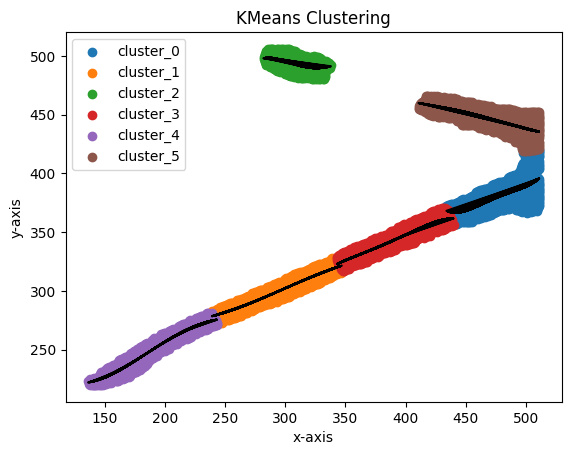

Shape is (512, 512)
(array([408, 409, 409, 409, 409, 409, 409, 409, 410, 410, 410, 410, 410,
       410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 411,
       411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411,
       411, 411, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 413, 413, 413, 413, 413, 413,
       413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 414, 414, 414,
       414, 414, 414, 414, 414, 414, 414, 414, 414, 414, 414, 414, 414,
       414, 414, 414, 414, 414, 415, 415, 415, 415, 415, 415, 415, 415,
       415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 416,
       416, 416, 416, 416, 416, 416, 416, 416, 416, 416, 416, 416, 416,
       416, 416, 416, 416, 416, 416, 416, 416, 416, 416, 416, 416, 416,
       416, 416, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417,
       417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417,
       417, 417, 417, 417, 418, 418, 418, 4

/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


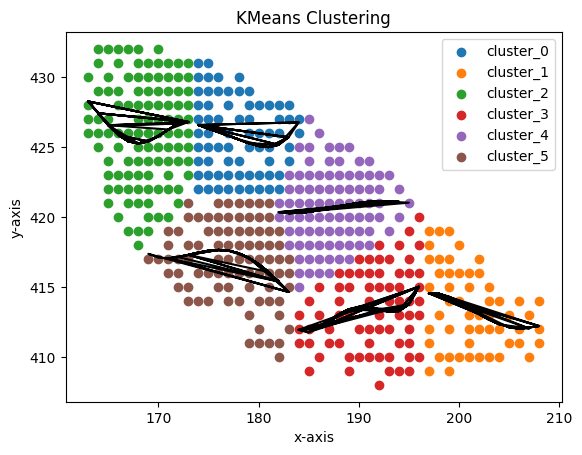

Length of X: 469
Cluster centers: [[177.53571429 416.79761905]
 [200.7        413.63333333]
 [167.65116279 425.98837209]
 [186.38372093 421.68604651]
 [175.84210526 426.11842105]
 [190.41558442 413.96103896]]
[{0, 1}]
[{0, 1}, {1, 5}]
[{0, 1}, {1, 5}, {1, 2}]
[{0, 1}, {1, 5}, {1, 2}, {1, 3}]
[{0, 1}, {1, 5}, {1, 2}, {1, 3}, {1, 4}]
[{0, 1}, {1, 5}, {1, 2}, {1, 3}, {1, 4}, {5}]


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


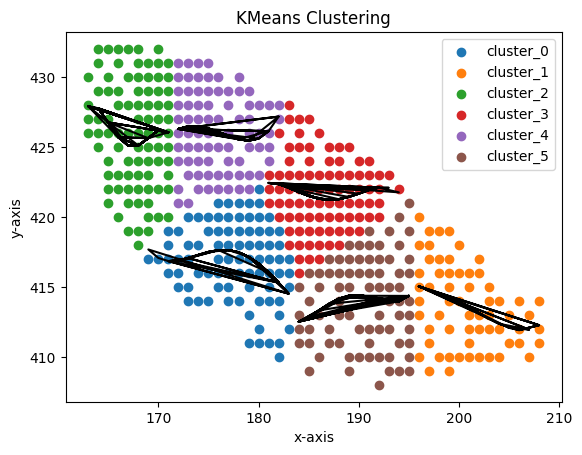

Shape is (512, 512)
(array([ 18,  18,  18, ..., 511, 511, 511]), array([ 87,  88,  90, ..., 325, 326, 327]))
[[ 87]
 [ 88]
 [ 90]
 ...
 [325]
 [326]
 [327]]
[[ 87  18]
 [ 88  18]
 [ 90  18]
 ...
 [325 511]
 [326 511]
 [327 511]]
Length of X: 20777


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers: [[338.52645203 394.98446853]
 [120.15023474  72.59289068]
 [237.53397765 212.85291453]
 [300.29052369 479.22319202]
 [303.3951908  311.57056979]
 [438.2752809  382.6618999 ]]
[{0, 1}]
[{0, 1}, {1, 2}]
[{0, 1}, {1, 2}, {2, 5}]
[{0, 1}, {1, 2}, {2, 5}, {1, 3}]
[{0, 1}, {1, 2}, {2, 5}, {1, 3}, {1, 4}]
[{0, 1}, {1, 2}, {2, 5}, {1, 3}, {1, 4}, {1, 5}]


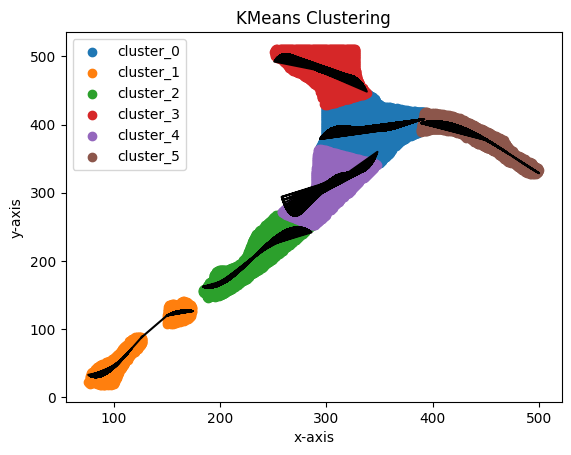

Length of X: 20777


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers: [[301.53693258 307.73757722]
 [236.37539038 211.24921924]
 [300.49925889 478.83745059]
 [120.15023474  72.59289068]
 [436.61174149 383.43068574]
 [337.42857143 393.17308304]]
[{0, 3}]
[{0, 3}, {1, 3}]
[{0, 3}, {1, 3}, {2, 3}]
[{0, 3}, {1, 3}, {2, 3}, {3, 5}]
[{0, 3}, {1, 3}, {2, 3}, {3, 5}, {3, 4}]
[{0, 3}, {1, 3}, {2, 3}, {3, 5}, {3, 4}, {5}]


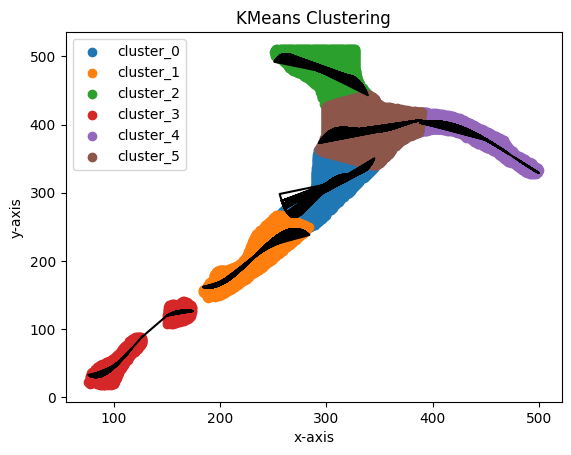

Shape is (512, 512)
(array([301, 302, 302, ..., 382, 382, 383]), array([  3,   1,   2, ..., 510, 511, 507]))
[[  3]
 [  1]
 [  2]
 ...
 [510]
 [511]
 [507]]
[[  3 301]
 [  1 302]
 [  2 302]
 ...
 [510 382]
 [511 382]
 [507 383]]
Length of X: 20426


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers: [[293.0610687  345.97770992]
 [ 41.20909363 326.32635357]
 [467.44181226 358.16375481]
 [209.01698218 338.76169265]
 [379.40950363 351.67433414]
 [126.14087694 332.1417256 ]]
[{0, 1}]
[{0, 1}, {1, 5}]
[{0, 1}, {1, 5}, {1, 2}]
[{0, 1}, {1, 5}, {1, 2}, {1, 3}]
[{0, 1}, {1, 5}, {1, 2}, {1, 3}, {1, 4}]
[{0, 1}, {1, 5}, {1, 2}, {1, 3}, {1, 4}, {5}]


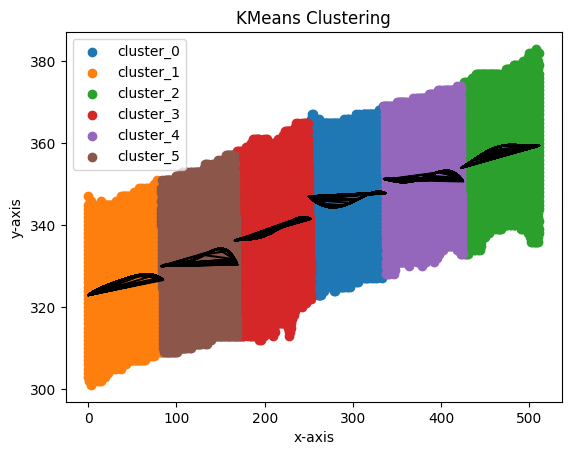

Length of X: 20426


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers: [[125.4306383  332.07829787]
 [466.8938286  358.10529395]
 [ 40.88667872 326.32640145]
 [378.2692075  351.63974592]
 [208.24534075 338.67621697]
 [292.07447135 345.88997855]]
[{0, 2}]
[{0, 2}, {1, 2}]
[{0, 2}, {1, 2}, {2, 5}]
[{0, 2}, {1, 2}, {2, 5}, {2, 3}]
[{0, 2}, {1, 2}, {2, 5}, {2, 3}, {2, 4}]
[{0, 2}, {1, 2}, {2, 5}, {2, 3}, {2, 4}, {5}]


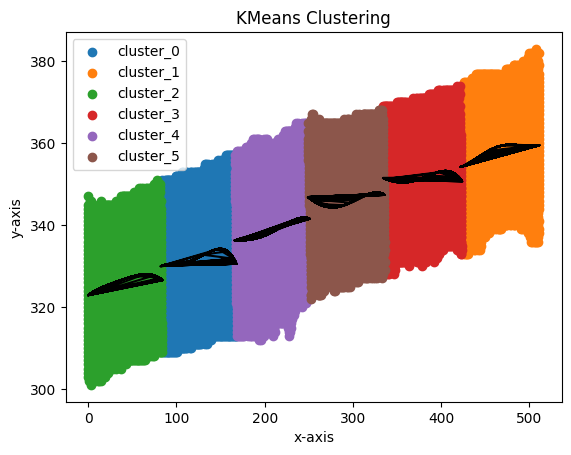

Shape is (512, 512)
(array([194, 195, 195, ..., 379, 379, 380]), array([501, 500, 501, ..., 129, 132, 128]))
[[501]
 [500]
 [501]
 ...
 [129]
 [132]
 [128]]
[[501 194]
 [500 195]
 [501 195]
 ...
 [129 379]
 [132 379]
 [128 380]]
Length of X: 2961
Cluster centers: [[142.17258883 365.9822335 ]
 [429.6073501  236.2901354 ]
 [245.98062016 319.87596899]
 [481.9554849  210.55007949]
 [377.13829787 260.54609929]
 [312.81231672 290.75953079]]
[{0, 3}]
[{0, 3}, {1, 3}]
[{0, 3}, {1, 3}, {2, 3}]
[{0, 3}, {1, 3}, {2, 3}, {3, 5}]
[{0, 3}, {1, 3}, {2, 3}, {3, 5}, {3, 4}]
[{0, 3}, {1, 3}, {2, 3}, {3, 5}, {3, 4}, {5}]


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


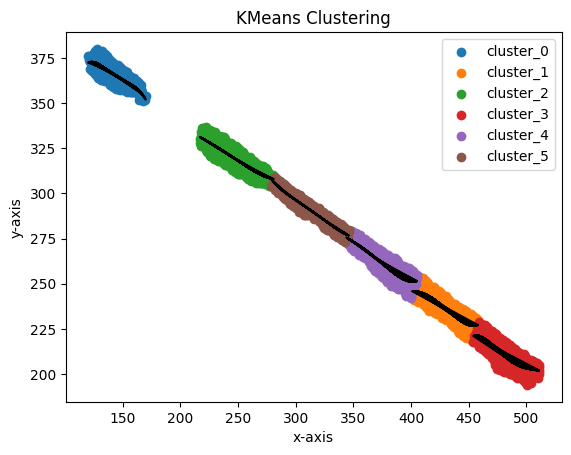

Length of X: 2961
Cluster centers: [[378.13126079 260.06044905]
 [245.91650485 319.90679612]
 [142.17258883 365.9822335 ]
 [431.19921875 235.5703125 ]
 [313.         290.66666667]
 [482.49025974 210.27922078]]
[{0, 5}]
[{0, 5}, {1, 5}]
[{0, 5}, {1, 5}, {2, 5}]
[{0, 5}, {1, 5}, {2, 5}, {3, 5}]
[{0, 5}, {1, 5}, {2, 5}, {3, 5}, {4, 5}]
[{0, 5}, {1, 5}, {2, 5}, {3, 5}, {4, 5}, {5}]


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


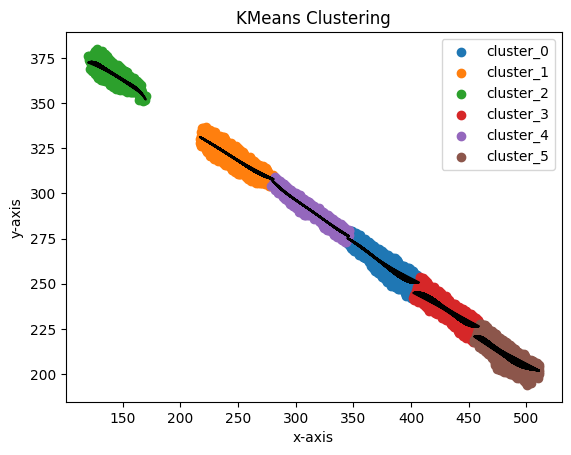

Shape is (512, 512)
(array([321, 322, 322, ..., 433, 434, 434]), array([223, 217, 218, ...,  14,  12,  14]))
[[223]
 [217]
 [218]
 ...
 [ 14]
 [ 12]
 [ 14]]
[[223 321]
 [217 322]
 [218 322]
 ...
 [ 14 433]
 [ 12 434]
 [ 14 434]]
Length of X: 1785
Cluster centers: [[ 21.32069971 422.04081633]
 [211.39855072 332.44565217]
 [ 86.48927039 395.24892704]
 [179.63050847 352.31186441]
 [ 68.77737226 403.59124088]
 [ 45.73076923 414.07967033]]
[{0, 1}]
[{0, 1}, {1, 3}]
[{0, 1}, {1, 3}, {1, 2}]
[{0, 1}, {1, 3}, {1, 2}, {3, 5}]
[{0, 1}, {1, 3}, {1, 2}, {3, 5}, {1, 4}]
[{0, 1}, {1, 3}, {1, 2}, {3, 5}, {1, 4}, {1, 5}]


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


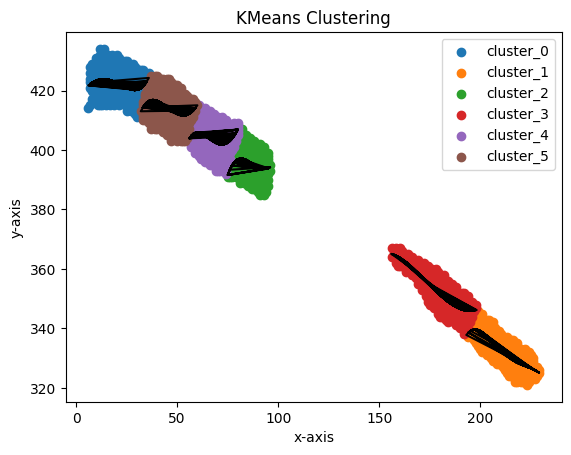

Length of X: 1785
Cluster centers: [[ 86.48927039 395.24892704]
 [179.63050847 352.31186441]
 [ 21.13313609 422.08284024]
 [ 68.6884058  403.61594203]
 [211.39855072 332.44565217]
 [ 45.51226158 414.1880109 ]]
[{0, 4}]
[{0, 4}, {1, 4}]
[{0, 4}, {1, 4}, {2, 4}]
[{0, 4}, {1, 4}, {2, 4}, {3, 4}]
[{0, 4}, {1, 4}, {2, 4}, {3, 4}, {4, 5}]
[{0, 4}, {1, 4}, {2, 4}, {3, 4}, {4, 5}, {5}]


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


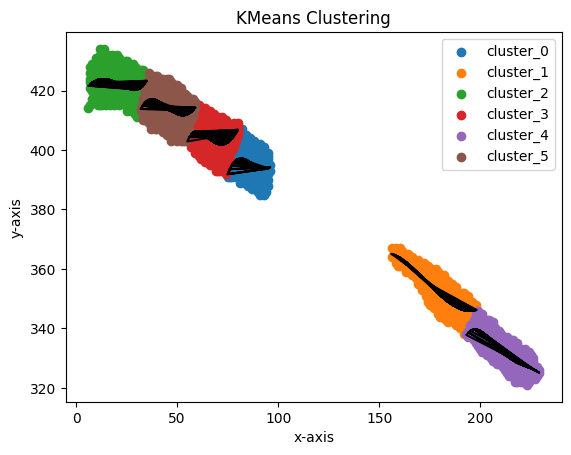

Shape is (512, 512)
(array([337, 337, 337, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338,
       339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339,
       339, 339, 340, 340, 340, 340, 340, 340, 340, 340, 340, 340, 340,
       340, 340, 340, 340, 340, 340, 340, 340, 340, 340, 340, 340, 340,
       340, 340, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341,
       341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341,
       341, 341, 341, 341, 341, 341, 342, 342, 342, 342, 342, 342, 342,
       342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342,
       342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 343, 343,
       343, 343, 343, 343, 343, 343, 343, 343, 343, 343, 343, 343, 343,
       343, 343, 343, 343, 343, 343, 343, 343, 343, 343, 343, 343, 343,
       343, 343, 343, 343, 343, 343, 343, 343, 343, 343, 344, 344, 344,
       344, 344, 344, 344, 344, 344, 344, 344, 344, 344, 344, 344, 344,
       344, 344, 344, 344, 344, 344, 344, 3

/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


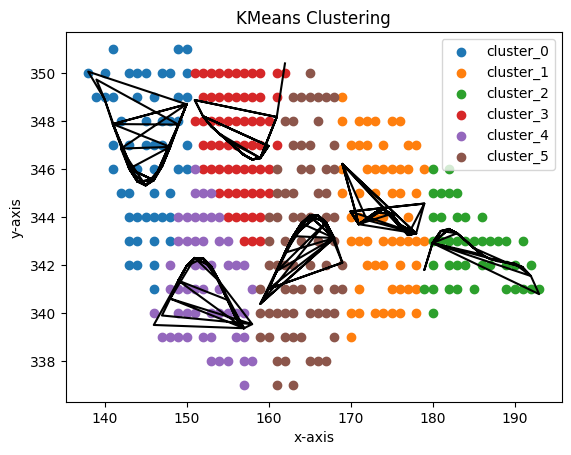

Length of X: 341
Cluster centers: [[163.73972603 343.08219178]
 [155.9516129  347.22580645]
 [184.64285714 342.69047619]
 [145.11764706 346.82352941]
 [173.70491803 343.95081967]
 [152.34615385 341.05769231]]
[{0, 5}]
[{0, 5}, {1, 5}]
[{0, 5}, {1, 5}, {2, 5}]
[{0, 5}, {1, 5}, {2, 5}, {3, 5}]
[{0, 5}, {1, 5}, {2, 5}, {3, 5}, {4, 5}]
[{0, 5}, {1, 5}, {2, 5}, {3, 5}, {4, 5}, {5}]


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


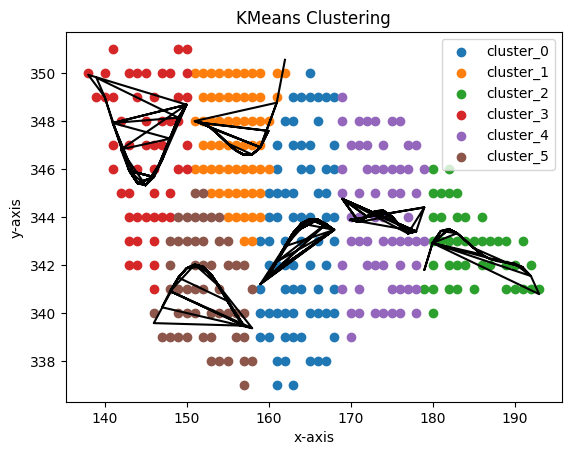

Shape is (512, 512)
(array([  0,   0,   0, ..., 432, 432, 432]), array([116, 117, 118, ..., 126, 127, 128]))
[[116]
 [117]
 [118]
 ...
 [126]
 [127]
 [128]]
[[116   0]
 [117   0]
 [118   0]
 ...
 [126 432]
 [127 432]
 [128 432]]
Length of X: 7164


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers: [[137.41394754 404.99744082]
 [157.30898876 228.95646067]
 [127.07399577  54.31501057]
 [158.14339623 312.19245283]
 [161.13482561 367.65070276]
 [142.12162162 139.93970894]]
[{0, 2}]
[{0, 2}, {1, 2}]
[{0, 2}, {1, 2}, {2, 5}]
[{0, 2}, {1, 2}, {2, 5}, {2, 3}]
[{0, 2}, {1, 2}, {2, 5}, {2, 3}, {2, 4}]
[{0, 2}, {1, 2}, {2, 5}, {2, 3}, {2, 4}, {5}]


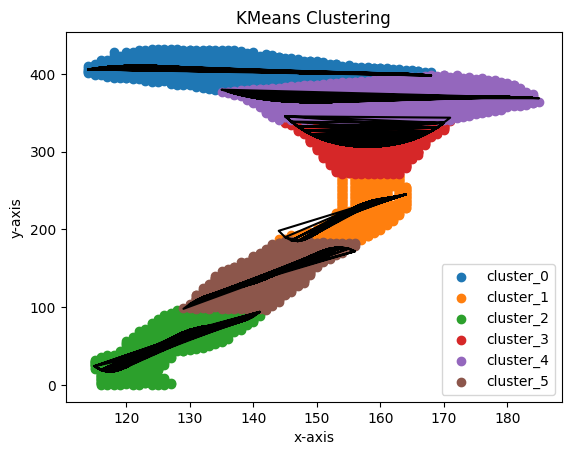

Length of X: 7164


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers: [[158.15435606 313.13068182]
 [127.21227888  54.98751301]
 [142.33991684 141.30769231]
 [157.49509116 230.83169705]
 [137.43997446 404.9642401 ]
 [161.15897167 367.79066107]]
[{0, 1}]
[{0, 1}, {1, 2}]
[{0, 1}, {1, 2}, {2, 5}]
[{0, 1}, {1, 2}, {2, 5}, {1, 3}]
[{0, 1}, {1, 2}, {2, 5}, {1, 3}, {1, 4}]
[{0, 1}, {1, 2}, {2, 5}, {1, 3}, {1, 4}, {1, 5}]


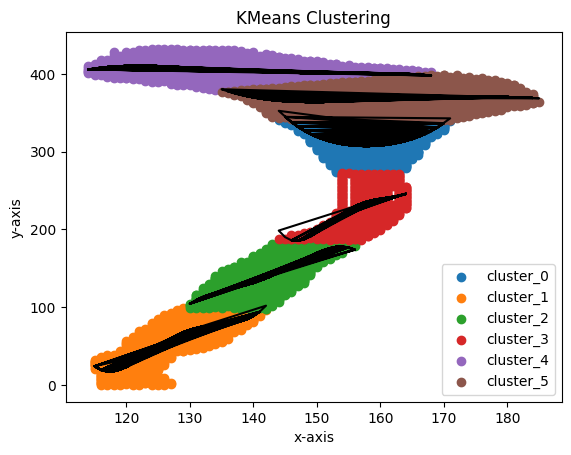

Shape is (512, 512)
(array([198, 198, 199, ..., 507, 507, 508]), array([345, 347, 345, ...,  16,  20,  22]))
[[345]
 [347]
 [345]
 ...
 [ 16]
 [ 20]
 [ 22]]
[[345 198]
 [347 198]
 [345 199]
 ...
 [ 16 507]
 [ 20 507]
 [ 22 508]]
Length of X: 70634


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers: [[169.90046941 398.07319596]
 [370.17460188 326.0060936 ]
 [268.35717032 353.92933487]
 [ 61.87378336 345.08864469]
 [ 59.05950864 445.23539581]
 [463.59949209 283.8597526 ]]
[{0, 5}]
[{0, 5}, {1, 5}]
[{0, 5}, {1, 5}, {2, 5}]
[{0, 5}, {1, 5}, {2, 5}, {3, 5}]
[{0, 5}, {1, 5}, {2, 5}, {3, 5}, {4, 5}]
[{0, 5}, {1, 5}, {2, 5}, {3, 5}, {4, 5}, {5}]


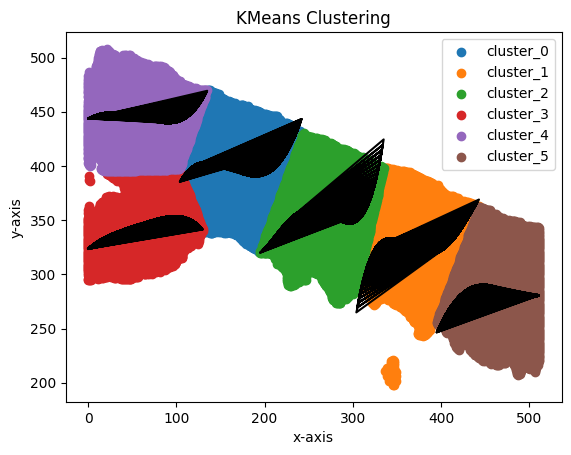

Length of X: 70634


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers: [[463.69629083 283.85983916]
 [170.22683935 397.7163515 ]
 [ 61.77834835 345.05522951]
 [370.3771052  325.82727199]
 [ 59.36192374 445.18666787]
 [268.7644749  353.93524792]]
[{0, 3}]
[{0, 3}, {0, 1}]
[{0, 3}, {0, 1}, {0, 2}]
[{0, 3}, {0, 1}, {0, 2}, {3, 5}]
[{0, 3}, {0, 1}, {0, 2}, {3, 5}, {0, 4}]
[{0, 3}, {0, 1}, {0, 2}, {3, 5}, {0, 4}, {0, 5}]


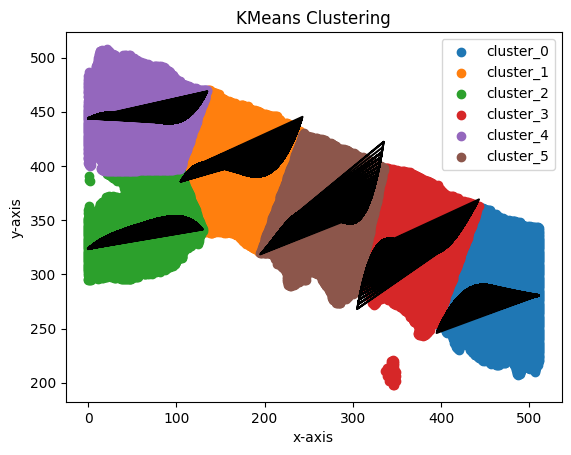

Shape is (512, 512)
(array([ 16,  16,  16, ..., 511, 511, 511]), array([252, 254, 258, ...,  91,  93,  95]))
[[252]
 [254]
 [258]
 ...
 [ 91]
 [ 93]
 [ 95]]
[[252  16]
 [254  16]
 [258  16]
 ...
 [ 91 511]
 [ 93 511]
 [ 95 511]]
Length of X: 31809


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers: [[319.23670606  80.00886263]
 [372.3106365  323.03848594]
 [105.30089917 463.81824021]
 [415.28950979 194.751528  ]
 [461.84471831 392.43080986]
 [199.12076271 391.34781073]]
[{0, 3}]
[{0, 3}, {0, 1}]
[{0, 3}, {0, 1}, {0, 2}]
[{0, 3}, {0, 1}, {0, 2}, {3, 5}]
[{0, 3}, {0, 1}, {0, 2}, {3, 5}, {0, 4}]
[{0, 3}, {0, 1}, {0, 2}, {3, 5}, {0, 4}, {0, 5}]


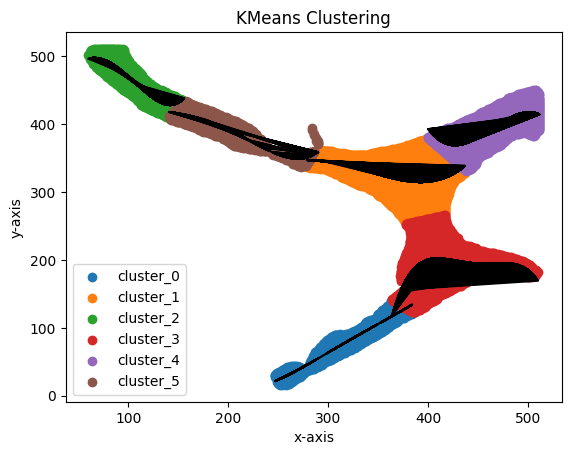

Length of X: 31809


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers: [[461.7951108  392.39693985]
 [319.35003685  80.13154016]
 [105.36999038 463.75152292]
 [199.35840395 391.22033898]
 [415.3230558  194.79590563]
 [372.3308987  323.00052927]]
[{0, 1}]
[{0, 1}, {1, 4}]
[{0, 1}, {1, 4}, {1, 2}]
[{0, 1}, {1, 4}, {1, 2}, {1, 3}]
[{0, 1}, {1, 4}, {1, 2}, {1, 3}, {4, 5}]
[{0, 1}, {1, 4}, {1, 2}, {1, 3}, {4, 5}, {1, 5}]


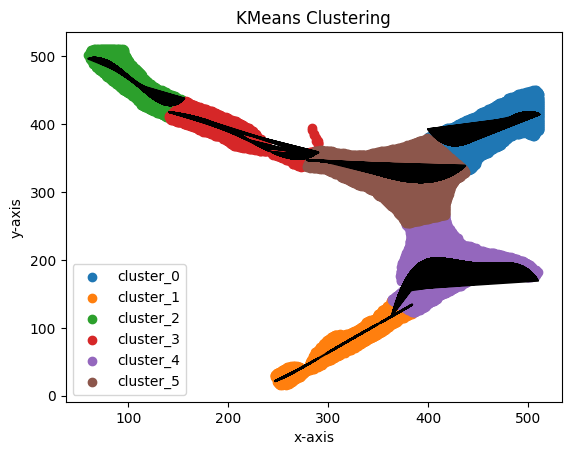

Shape is (512, 512)
(array([271, 272, 272, 272, 272, 272, 273, 273, 273, 274, 274, 274, 274,
       274, 279, 279, 280, 280, 280, 281, 281, 282, 282, 282, 282, 282,
       282, 283, 283, 283, 283, 284, 284, 284, 284, 284, 284, 285, 285,
       285, 285, 285, 285, 285, 285, 285, 286, 286, 286, 286, 286, 286,
       286, 286, 286, 286, 286, 286, 286, 286, 287, 287, 287, 287, 287,
       287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289,
       289, 289, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 291,
       291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 291,
       291, 291, 292, 292, 292, 292, 292, 292, 292, 292, 292, 292, 292,
       292, 292, 293, 293, 293, 293, 293, 293, 293, 293, 293, 293, 293,
       293, 293, 293, 293, 293, 293, 293, 293, 293, 293, 293, 293, 293,
       294, 294, 294, 294, 294, 294, 294, 2

/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


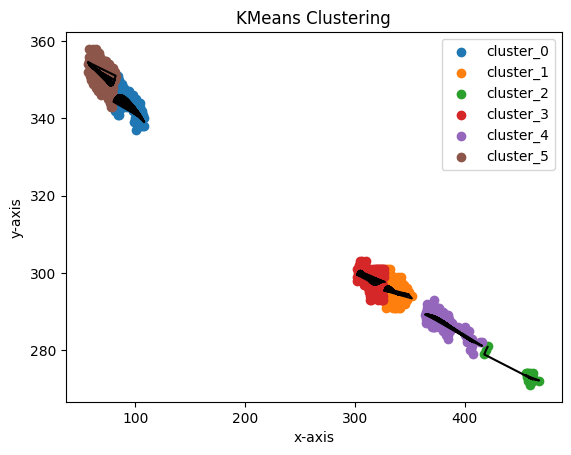

Length of X: 616
Cluster centers: [[316.71666667 298.05      ]
 [ 92.34234234 344.0990991 ]
 [381.6460177  286.97345133]
 [454.9375     273.8125    ]
 [ 68.97841727 351.36690647]
 [336.65811966 295.26495726]]
[{0, 3}]
[{0, 3}, {1, 3}]
[{0, 3}, {1, 3}, {2, 3}]
[{0, 3}, {1, 3}, {2, 3}, {3, 5}]
[{0, 3}, {1, 3}, {2, 3}, {3, 5}, {3, 4}]
[{0, 3}, {1, 3}, {2, 3}, {3, 5}, {3, 4}, {5}]


/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


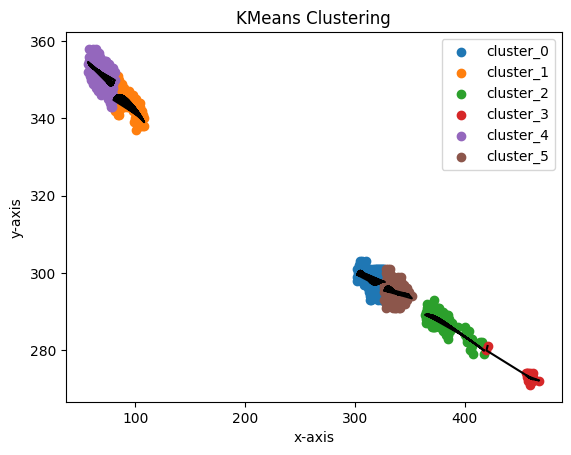

Shape is (512, 512)
(array([269, 269, 270, 270, 270, 270, 271, 271, 271, 271, 271, 271, 271,
       271, 271, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272,
       272, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 274,
       274, 274, 274, 274, 274, 274, 274, 274, 274, 274, 274, 274, 274,
       274, 274, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275,
       275, 275, 275, 275, 275, 276, 276, 276, 276, 276, 276, 276, 276,
       276, 276, 276, 276, 276, 276, 276, 276, 276, 276, 276, 276, 277,
       277, 277, 277, 277, 277, 277, 277, 277, 277, 277, 277, 277, 277,
       277, 277, 277, 277, 277, 277, 277, 278, 278, 278, 278, 278, 278,
       278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 279,
       279, 279, 279, 279, 279, 279, 279, 279, 279, 279, 279, 279, 279,
       279, 279, 279, 279, 279, 279, 279, 280, 280, 280, 280, 280, 280,
       280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280,
       280, 280, 281, 281, 281, 281, 281, 2

/Users/senneloobuyck/Library/CloudStorage/OneDrive-UGent/Documenten/UGent_2022-2023/VENTOUX_v1.0/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centers: [[351.65671642 296.65671642]
 [338.96610169 278.94915254]
 [322.42682927 274.13414634]
 [347.08219178 286.87671233]
 [337.20634921 285.42857143]
 [328.22857143 279.08571429]]
[{0, 2}]
[{0, 2}, {1, 2}]
[{0, 2}, {1, 2}, {2, 5}]
[{0, 2}, {1, 2}, {2, 5}, {2, 3}]
[{0, 2}, {1, 2}, {2, 5}, {2, 3}, {2, 4}]
[{0, 2}, {1, 2}, {2, 5}, {2, 3}, {2, 4}, {5}]


KeyboardInterrupt: 

In [9]:
def distance_point_to_line(x, y, a1, b1) : 
    # First convert y = a1*x + b1 to a*x + b*y + c = 0
    a = -(a1/b1)
    b = 1/b1
    c = -1 
    return (abs(a*x+b*y+c)) / (math.sqrt(a*a + b*b))

def cluster_and_intersec_points(X, n_clusters) :
    print_bool = False 

    # Define and fit the model to data
    kmeans = KMeans(n_clusters=n_clusters).fit(X)

    cluster_centers = kmeans.cluster_centers_
    
    print(f"Cluster centers: {cluster_centers}")

    # Assign a cluster to each example
    yhat = kmeans.predict(X)

    # Retrieve unique clusters
    clusters = np.unique(yhat)

    clusters_intersecs_used = []
    intersec_points = []

    count = 0 
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # Get row indexes for samples with this cluster
        row_ix = np.where(yhat == cluster)

        # Fit a line using NumPy polyfit to the data points of this cluster
        x_cluster = X[row_ix, 0][0]
        y_cluster = X[row_ix, 1][0]

        poly = np.polyfit(x_cluster, y_cluster, deg=4)
        
        # Generate the y-axis values against x-values according to the parameter a 
        y_line = np.polyval(poly, x_cluster)

        # ---------------------------------------------------------------
        
        cluster_center = cluster_centers[count]

        # Calculate the Euclidean distance between each cluster center and the "cluster_center"
        # Exclude the current cluster center from the array of cluster centers
        remaining_cluster_centers = np.delete(cluster_centers, count, axis=0)
        distances = []
        for i, cc in enumerate(remaining_cluster_centers) : 
            distance = distance_point_to_line(cc[0], cc[1], a, b)
            distances.append(distance)
 
        # Find the index of the closest cluster center, the index of lowest value in "distances"
        index_closest_cluster = np.argmin(distances)
        closest_cluster_center = remaining_cluster_centers[index_closest_cluster]
        for i, arr in enumerate(cluster_centers):
                if np.all(arr == closest_cluster_center):
                    closest_cluster = i

        if print_bool : 
            print(f"COUNT = {count}")
            print(f"Clusters intersecs used = {clusters_intersecs_used}")
            print(f"Remaining cluster centers: {remaining_cluster_centers}")
            print(f"Distances: {distances}")
            print(f"Index closest cluster: {index_closest_cluster}")
            print(f"Closest cluster center: {closest_cluster_center}")
            print(f"Closest cluster: {closest_cluster}")

        while {cluster, closest_cluster} in clusters_intersecs_used:
            for i, arr in enumerate(remaining_cluster_centers) : 
                if np.all(arr == closest_cluster_center) :
                    remaining_cluster_centers = np.delete(remaining_cluster_centers, i, axis=0)

            distances = []
            for i, cc in enumerate(remaining_cluster_centers) : 
                distance = distance_point_to_line(cc[0], cc[1], a, b)
                distances.append(distance)
            
            shortest_distance = np.argmin(distances)
            index_closest_cluster = np.where(distances==shortest_distance)
            closest_cluster_center = remaining_cluster_centers[index_closest_cluster]

            for i, arr in enumerate(cluster_centers):
                if np.all(arr == closest_cluster_center):
                    closest_cluster = i

            if print_bool :
                print(f"Clusters intersecs used = {clusters_intersecs_used}")
                print(f"Remaining cluster centers: {remaining_cluster_centers}")
                print(f"Distances: {distances}")
                print(f"Shortest distance: {shortest_distance}")
                print(f"Index closest cluster: {index_closest_cluster}")
                print(f"Closest cluster center: {closest_cluster_center}")
                print(f"Closest cluster: {closest_cluster}")

        clusters_intersecs_used.append({cluster, closest_cluster})

        print(clusters_intersecs_used)

        row_ix_closest = np.where(yhat == closest_cluster)

        x_closest_cluster = X[row_ix_closest, 0][0]
        y_closest_cluster = X[row_ix_closest, 1][0]

        poly_closest = np.polyfit(x_closest_cluster, y_closest_cluster, 1)

        y_fit_closest = np.polyval(poly_closest, x_closest_cluster)

        # intersection_x = abs(b_closest - b) / abs(a - a_closest)
        # intersection_y = a_closest * intersection_x + b_closest

        # intersec_points.append((intersection_x, intersection_y))

        count += 1

        # Invert the y-axis to display with descending values
        # plt.gca().invert_yaxis()

        # Plot the cluster points
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f"cluster_{str(cluster)}")
        # Plot the fitting line
        plt.plot(x_cluster, y_line, color='black')
        # Plot the cluster center
        # plt.scatter(cluster_center[0], cluster_center[1], marker="o", label=f"cluster_center_{str(cluster)}")


    for point in intersec_points : 
        print(f"Point = {point}")
        plt.scatter(point[0], point[1], color="yellow", marker="x")

    if print_bool :
        print(f"Intersection points {intersec_points}")

    # Setting the x-axis and y-axis limits
    # plt.xlim(0, 512)
    # plt.ylim(0, 512)
    # Show the plot
    plt.title('KMeans Clustering')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend()
    plt.show()
    return intersec_points


for img_name in os.listdir(predicted_masks_dir) : 
    img_path = os.path.join(predicted_masks_dir, img_name)
    binary_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    print(f"Shape is {binary_img.shape}")

    # Find the indices of the white pixels
    white_pixel_indices = np.where(binary_img == 255)
    print(white_pixel_indices)
    
    # Extract x and y coordinates of the white pixels
    x_white = white_pixel_indices[1].reshape(-1, 1)
    y_white = white_pixel_indices[0].reshape(-1, 1)
    print(x_white)

    # Combine the x and y coordinates into a single feature vector
    X = np.hstack((x_white, y_white))
    print(X)
    print("Length of X:", len(X))

    n_clusters = 6

    intersec_points = cluster_and_intersec_points(X=X, n_clusters=n_clusters)

    for point in intersec_points : 
        x_white = np.append(x_white, np.array(point[0]))
        y_white = np.append(y_white, np.array(point[1]))

    x_white = np.array(x_white).reshape(-1, 1)
    y_white = np.array(y_white).reshape(-1, 1)
    X = np.hstack((x_white, y_white))
    print("Length of X:", len(X))

    intersec_points = cluster_and_intersec_points(X=X, n_clusters=n_clusters)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(array([  8,   8,   9, ..., 511, 511, 511]), array([292, 294, 295, ..., 193, 194, 197]))


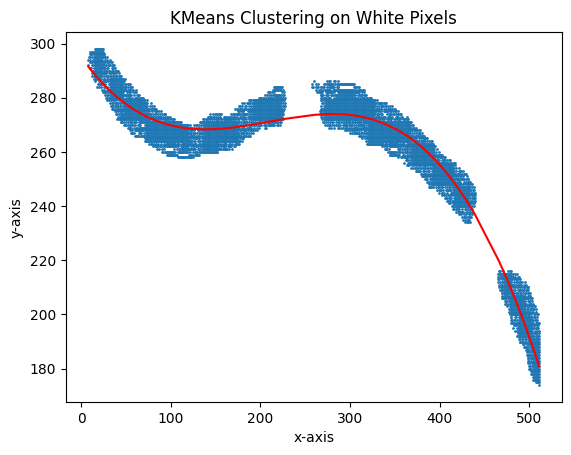

In [ ]:
img_path = os.path.join(os.getcwd(), "predicted_masks", "2020_KBK_435.jpg")
img = cv2.imread(img_path)
binary_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print(binary_img)

# Find the indices of the white pixels
white_pixel_indices = np.where(binary_img == 255)

print(white_pixel_indices)

# Extract x and y coordinates of the white pixels
x_white = white_pixel_indices[1].flatten()
y_white = white_pixel_indices[0].flatten()

a, b, c, d = np.polyfit(y_white, x_white, 3)

# y = a*pow(x_white, 2) + b*pow(x_white, 1) + c
x = a*pow(y_white, 3) + b*pow(y_white, 2) + c*pow(y_white, 1) + d


# plt.plot(x_white, y, 'r')
plt.plot(y_white, x, 'r')
# Plot the cluster points
# plt.scatter(x_white, y_white, 1)
plt.scatter(y_white, x_white, 1)
# Plot intersection point
plt.title('KMeans Clustering on White Pixels')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# Scipy optimize curve fit

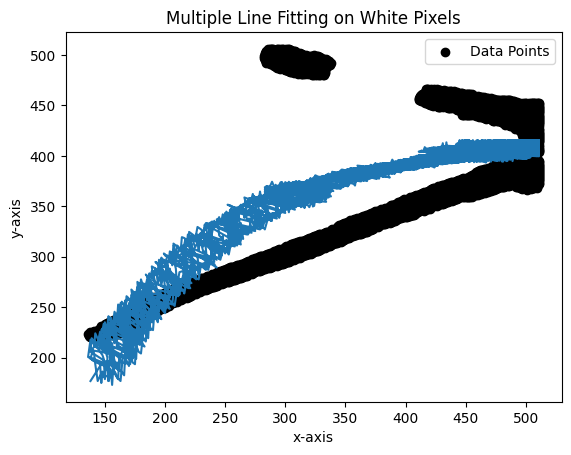

In [ ]:
# Scipy optimize curve fit
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Read the binary image using OpenCV (make sure it's a single-channel image)
img_path = os.path.join(predicted_masks_dir, "2020_KBK_20.jpg")
binary_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Find the indices of the white pixels
white_pixel_indices = np.where(binary_img == 255)

# Extract x and y coordinates of the white pixels
x_white = white_pixel_indices[1]
y_white = white_pixel_indices[0]

# Sort the points based on y-coordinates to ensure the points are in the right order
sorted_indices = np.argsort(y_white)
x_white_sorted = x_white[sorted_indices]
y_white_sorted = y_white[sorted_indices]

# Function to fit a line (y = mx + c)
def line(x, a, b, c, d):
    return a * pow(x,3) + b * pow(x,2) + c * pow(x,1) + d 

# Function to fit and subtract a line from the data points
def fit_and_subtract_line(x, y):
    params, _ = curve_fit(line, x, y)
    y_fit = line(x, *params)
    y_subtract = y - y_fit
    print(y_subtract)
    return y_subtract, params

def fit_line(x, y) : 
    params, _ = curve_fit(line, x, y)
    y_fit = line(x, *params)
    return y_fit
    

# List to store the fitted line parameters
all_params = []

# Fitting multiple lines iteratively
# while len(y_white_sorted) > 6:
#     y_white_sorted, params = fit_and_subtract_line(x_white_sorted, y_white_sorted)
#     all_params.append(params)

# y_white_sorted, params = fit_and_subtract_line(x_white_sorted, y_white_sorted)

# Plotting the original data points and the fitted lines
# plt.scatter(x_white, y_white, label='Data Points', color='black')
# for params in all_params:
#     a, b, c, d = params
#     y_line = line(x_white, a, b, c, d)
#     plt.plot(x_white, y_line)

# m, c = params
# y_line = line(x_white, m, c)
# plt.plot(x_white, y_line, label=f'Line: y = {m:.2f}x + {c:.2f}')

y_line = fit_line(x_white_sorted, y_white_sorted)

# Plotting the original data points and the fitted lines
plt.scatter(x_white, y_white, label='Data Points', color='black')
plt.plot(x_white, y_line)
plt.title('Multiple Line Fitting on White Pixels')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()


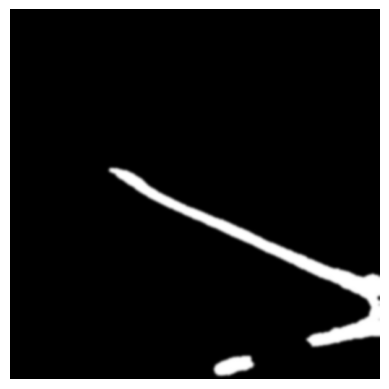

In [ ]:
import os 
import cv2

# Read the binary image using OpenCV (make sure it's a single-channel image)
img_path = os.path.join(predicted_masks_dir, "2020_KBK_20.jpg")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(src=img, ksize=(9, 9), sigmaX=0)

# Display the original and blurred images side by side
plot_img(blurred_image)

Degree 1: Average R-squared score: 1.0


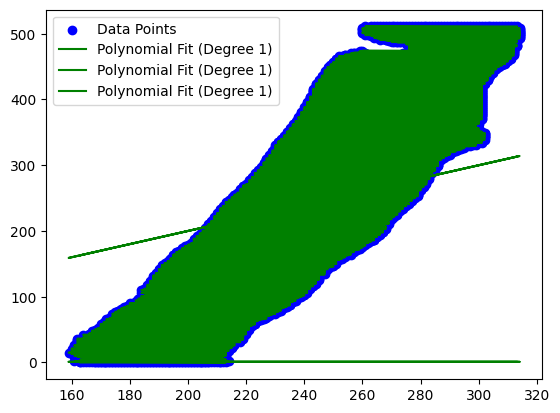

Degree 2: Average R-squared score: 1.0


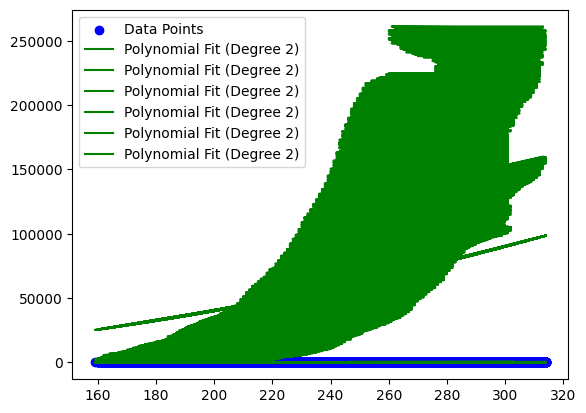

Degree 3: Average R-squared score: 1.0


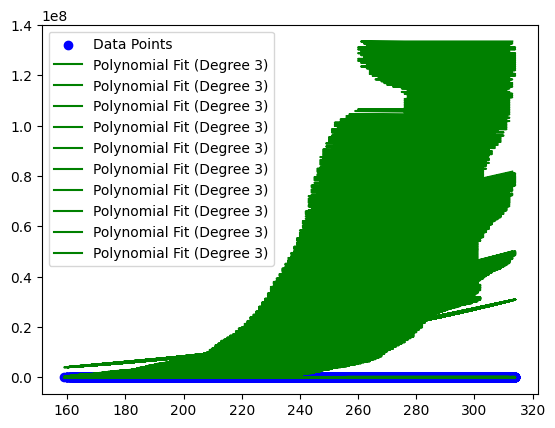

Degree 4: Average R-squared score: 0.9999999999999838


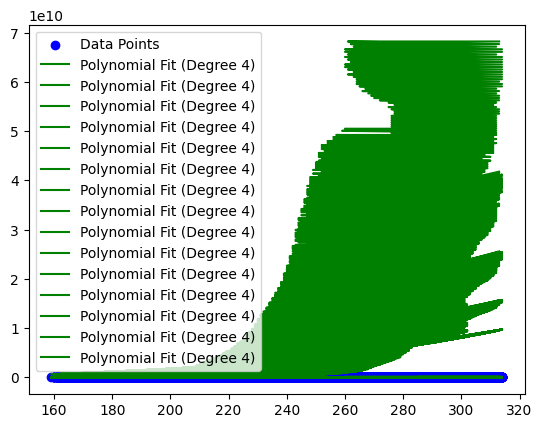

Degree 5: Average R-squared score: 0.9999999998463025


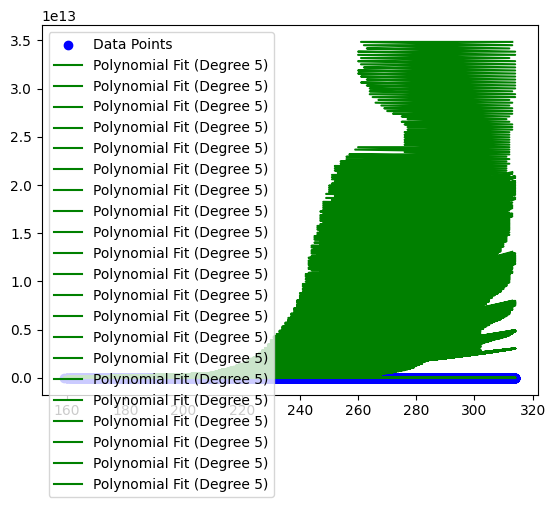

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

img_path = os.path.join(predicted_masks_dir, "2020_KBK_875.jpg")
binary_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Find the indices of the white pixels
white_pixel_indices = np.where(binary_img == 255)
# print(white_pixel_indices)

# Extract x and y coordinates of the white pixels
x_white = white_pixel_indices[1].reshape(-1, 1)
y_white = white_pixel_indices[0].reshape(-1, 1)

# Combine the x and y coordinates into a single feature vector
X = np.hstack((x_white, y_white))

# Number of polynomial degrees to try
degrees = [1, 2, 3, 4, 5]

# Number of folds for cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Iterate over the polynomial degrees
for degree in degrees:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)

    # Create a Linear Regression model
    model = LinearRegression()

    # Lists to store the evaluation scores for each fold
    r2_scores = []

    # Iterate over the K folds
    for train_index, test_index in kf.split(X):
        # Split data into training and test sets for this fold
        X_train, X_test = X[train_index], X[test_index]
        # y_train, y_test = y_white[train_index], y_white[test_index]

        # Fit the model on the training data
        X_poly = polynomial_features.fit_transform(X)

        # Evaluate the model on the test data and calculate R-squared score
        r2_score = 

        # Store the R-squared score for this fold
        r2_scores.append(r2_score)

    # Calculate the average R-squared score across all folds
    average_r2_score = np.mean(r2_scores)

    print(f"Degree {degree}: Average R-squared score: {average_r2_score}")


    # Plot the data points
    plt.scatter(x_white, y_white, label="Data Points", color="blue")

    # Plot the polynomial fit
    plt.plot(x_white, X_poly, color='green', label=f"Polynomial Fit (Degree {degree})")

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()








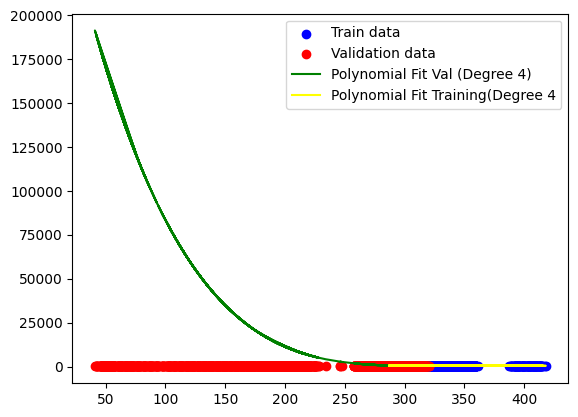

r_squared for degree 4 and fold 0 = -599308.5577586702


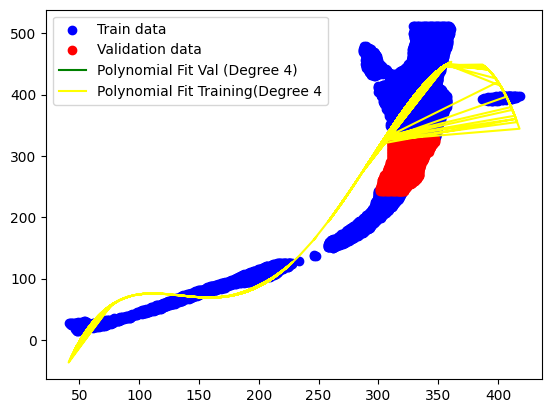

r_squared for degree 4 and fold 1 = -12.595727828329204


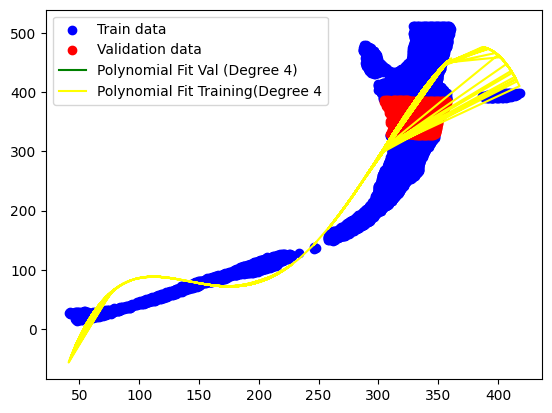

r_squared for degree 4 and fold 2 = -6.02341289928953


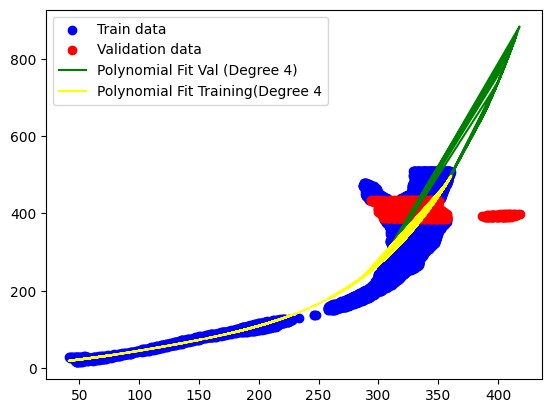

r_squared for degree 4 and fold 3 = -60.47642736984906


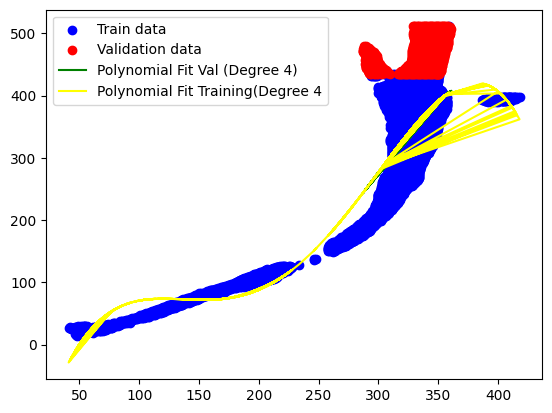

r_squared for degree 4 and fold 4 = -24.136243861842754


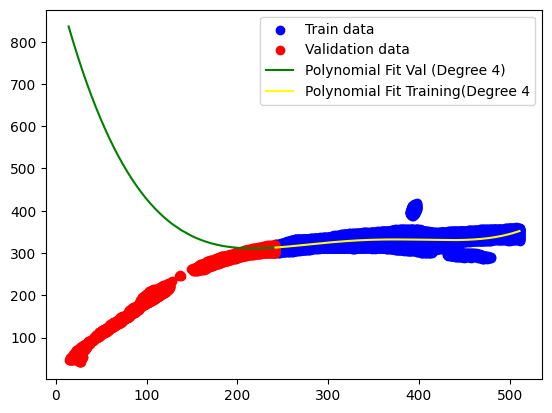

r_squared for degree 4 and fold 0 = -12.708277469114872


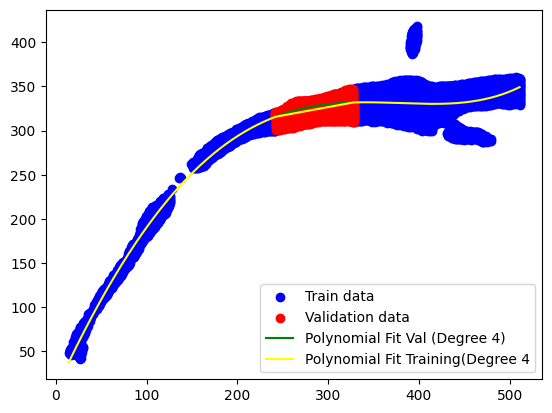

r_squared for degree 4 and fold 1 = -0.021607716358050366


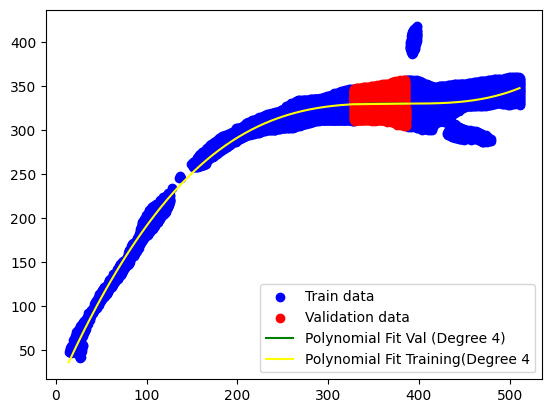

r_squared for degree 4 and fold 2 = 0.0012279396166631207


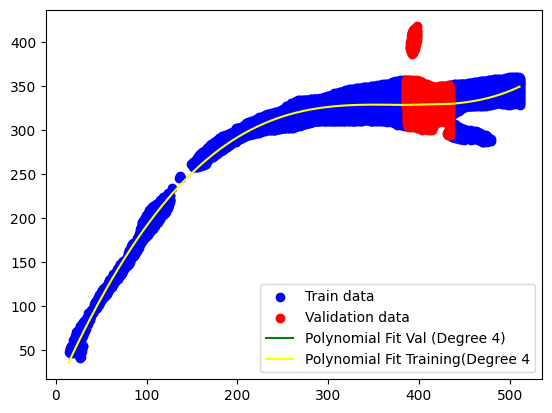

r_squared for degree 4 and fold 3 = -0.03278336826642847


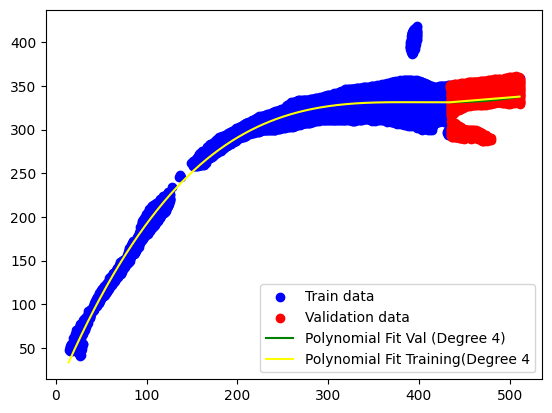

r_squared for degree 4 and fold 4 = 0.044741979890956296
Mean mse = 18687.11595767364, mean r_squared = -2.5433397268463462


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error


img_path = os.path.join(predicted_masks_dir, "2020_KBK_75.jpg")
binary_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Find the indices of the white pixels
white_pixel_indices = np.where(binary_img == 255)
# print(white_pixel_indices)

# Extract x and y coordinates of the white pixels
x = white_pixel_indices[1].reshape(-1, 1)
y = white_pixel_indices[0].reshape(-1, 1)

# Combine the x and y coordinates into a single feature vector
X = np.hstack((x, y))

def polynomial_regression(x_train, y_train, x_val, y_val, degree) :
    x_train = x_train.flatten()
    y_train = y_train.flatten()
    coefficients = np.polyfit(x_train, y_train, degree)
    y_pred_val = np.polyval(coefficients, x_val)
    y_pred_train = np.polyval(coefficients, x_train)
    mse = mean_squared_error(y_val, y_pred_val)
    r_squared = r2_score(y_val, y_pred_val)

    plt.scatter(x_train, y_train, label="Train data", color="blue")
    plt.scatter(x_val, y_val, label="Validation data", color="red")
    plt.plot(x_val, y_pred_val, color='green', label=f"Polynomial Fit Val (Degree {degree})")
    plt.plot(x_train, y_pred_train, color='yellow', label=f"Polynomial Fit Training(Degree {degree}")
    plt.legend()
    plt.show()
    return mse, r_squared


def k_fold_cross_validation(x, y, k, degree) : 
    n = len(x)
    fold_size = n // k 
    mse_scores = []
    r_squared_scores = []

    for i in range(k) :
        start, end = i * fold_size, (i + 1) * fold_size
        x_val, y_val = x[start:end], y[start:end]
        x_train = np.append(x[:start], x[end:], axis=0)
        y_train = np.append(y[:start], y[end:], axis=0)

        mse, r_squared = polynomial_regression(x_train, y_train, x_val, y_val, degree)
        print(f"r_squared of validation for degree {degree} and fold {i} = {r_squared}")
        mse_scores.append(mse)
        r_squared_scores.append(r_squared)
        

    return np.mean(mse_scores), np.mean(r_squared_scores)

# on normal data
mean_mse, mean_r_squared = k_fold_cross_validation(x, y, 5, 4)
# x and y inverted
mean_mse, mean_r_squared = k_fold_cross_validation(y, x, 5, 4)
print(f"Mean mse = {mean_mse}, mean r_squared = {mean_r_squared}")



In [10]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import DBSCAN
import os
import numpy as np 
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

In [ ]:

def distance_point_to_line(x, y, a1, b1) : 
    # First convert y = a1*x + b1 to a*x + b*y + c = 0
    a = -(a1/b1)
    b = 1/b1
    c = -1 
    return (abs(a*x+b*y+c)) / (math.sqrt(a*a + b*b))

In [ ]:

def polyfit_data(X=X, X_inversed=X) :
    print_bool = False  
    # just to show that swapping x and y gives a better result for fitting
    x_values = X[:, 0]
    y_values = X[:, 1]

    poly = np.polyfit(x_values, y_values, deg=4)

    y_fit = np.polyval(poly, x_values)

    plt.scatter(x_values, y_values, label="actual data")
    plt.plot(x_values, y_fit, color='black')
    plt.legend()
    plt.show()

    # Compute the R-squared (coefficient of determination)
    r_squared = r2_score(y_values, y_fit)
    print(f"R_squared error for X = {r_squared}")

    # ------------------------------
    # Now the actual computations are done on the inversed data
    x_values = X_inversed[:, 0]
    y_values = X_inversed[:, 1]

    poly = np.polyfit(x_values, y_values, deg=4)

    y_fit = np.polyval(poly, x_values)

    plt.scatter(x_values, y_values, label="reversed data")
    plt.plot(x_values, y_fit, color='black')
    plt.legend()
    plt.show()

    # Compute the R-squared (coefficient of determination)
    r_squared = r2_score(y_values, y_fit)
    print(f"R_squared error for X_inversed = {r_squared}")

    # Start a new empty plot
    plt.figure()
    
    # If score is not high enough, divide data into clusters and find best fit for each cluster
    # Do this until all the clusters have a score equal to or above 0.9 
    if r_squared < 0.9 : 
        epsilon = 15
        min_points = 20

        # Define and fit the model to data
        dbscan = DBSCAN(eps=epsilon, min_samples=min_points)

        # Assign a cluster to each example
        yhat = dbscan.fit_predict(X_inversed)

        # Retrieve unique clusters
        clusters = np.unique(yhat)

        # print(f"Clusters = {clusters}")

        if len(clusters) < 2 : 
            print(f"Only {len(clusters)} clusters could be formed.")
            return None 

        clusters_intersecs_used = []
        # intersec_points = []
        cluster_centers = []

        for cluster in clusters:
            # Get row indexes for samples with this cluster
            row_ix = np.where(yhat == cluster)

            # Fit a line using NumPy polyfit to the data points of this cluster
            x_cluster = X_inversed[row_ix, 0][0]
            y_cluster = X_inversed[row_ix, 1][0]

            # Calculate the mean x and y values of the cluster to approximate the cluster center
            cluster_center = (np.mean(x_cluster), np.mean(y_cluster))
    
            # Append the cluster center to the list of cluster centers
            cluster_centers.append(cluster_center)

        count = 0 
        for cluster in clusters:
            # Get row indexes for samples with this cluster
            row_ix = np.where(yhat == cluster)
            # print(row_ix)

            # Fit a line using NumPy polyfit to the data points of this cluster
            x_cluster = X_inversed[row_ix, 0][0]
            y_cluster = X_inversed[row_ix, 1][0]

            poly = np.polyfit(x_cluster, y_cluster, deg=4)
            
            # Generate the y-axis values against x-values according to the parameter a 
            y_fit = np.polyval(poly, x_cluster)

            # Compute the R-squared (coefficient of determination)
            r_squared = r2_score(y_cluster, y_fit)

            print(f"R_squared error = {r_squared}")

            cluster_center = cluster_centers[count]

            # Calculate the Euclidean distance between each cluster center and the "cluster_center"
            # Exclude the current cluster center from the array of cluster centers
            remaining_cluster_centers = np.delete(cluster_centers, count, axis=0)
            distances = []
            for i, cc in enumerate(remaining_cluster_centers) : 
                # distance = distance_point_to_line(cc[0], cc[1], a, b)
                # Calculate the Euclidean distance between the two points
                distance = np.linalg.norm(cc - cluster_center)
                distances.append(distance)

            # print(f"Hey distances = {distances}")
            # Find the index of the closest cluster center, the index of lowest value in "distances"
            index_closest_cluster = np.argmin(distances)
            closest_cluster_center = remaining_cluster_centers[index_closest_cluster]
            for i, arr in enumerate(cluster_centers):
                    if np.all(arr == closest_cluster_center):
                        closest_cluster = clusters[i]

            while {cluster, closest_cluster} in clusters_intersecs_used :
                for i, arr in enumerate(remaining_cluster_centers) : 
                    if np.all(arr == closest_cluster_center) :
                        remaining_cluster_centers = np.delete(remaining_cluster_centers, i, axis=0)

                if remaining_cluster_centers.size == 0 : 
                    return None
                distances = []
                for i, cc in enumerate(remaining_cluster_centers) : 
                    distance = np.linalg.norm(cc - cluster_center)
                    distances.append(distance)
                
                print(f"Remaining cluster centers = {remaining_cluster_centers}")
                index_closest_cluster = np.argmin(distances)
                closest_cluster_center = remaining_cluster_centers[index_closest_cluster]
                for i, arr in enumerate(cluster_centers):
                    if np.all(arr == closest_cluster_center):
                        closest_cluster = clusters[i]


            clusters_intersecs_used.append({cluster, closest_cluster})

            row_ix_closest = np.where(yhat == closest_cluster)

            x_closest_cluster = X_inversed[row_ix_closest, 0][0]
            y_closest_cluster = X_inversed[row_ix_closest, 1][0]

            poly_closest = np.polyfit(x_closest_cluster, y_closest_cluster, deg=4)

            y_fit_all = np.polyval(poly, x_values)

            y_fit_closest_all = np.polyval(poly_closest, x_values)

            # print(f"Cluster = {cluster}")
            # print(f"Closest_cluster = {closest_cluster}")

            roots = np.roots(poly - poly_closest)
            # print(f"All roots = {roots}")
            
            # Filter out the roots to the first real root
            real_roots = roots[np.isreal(roots)].real
            # print(f"Real roots = {real_roots}")

            # Plot the cluster points
            plt.scatter(X_inversed[row_ix, 0], X_inversed[row_ix, 1], label=f"cluster_{str(cluster)}")
            # Plot the fitting line
            plt.plot(x_cluster, y_fit, color='black')

            # for root in roots :
            #     intersection_x = root.real
            #     intersection_y = root.imag
            #     # intersection_y = np.polyval(poly, intersection_x)
            #     plt.scatter(intersection_x, intersection_y, color='yellow', marker="x")
            #     print(f"Intersection x value = {intersection_x}")
            #     print(f"Intersection y value = {intersection_y}") 

            # intersection_x = root
            # intersection_y = np.polyval(poly, intersection_x)
            
            # if real_roots.size > 0 : 
            #    intersection_x = real_roots[0]
            #    intersection_y = np.polyval(poly, intersection_x)


            # Plot the intersections
            # plt.scatter(intersection_x, intersection_y, color='yellow', marker="x")

            count += 1
    
        plt.legend()
        plt.show()
        return None

IMG NAME is 2020_KBK_20.jpg


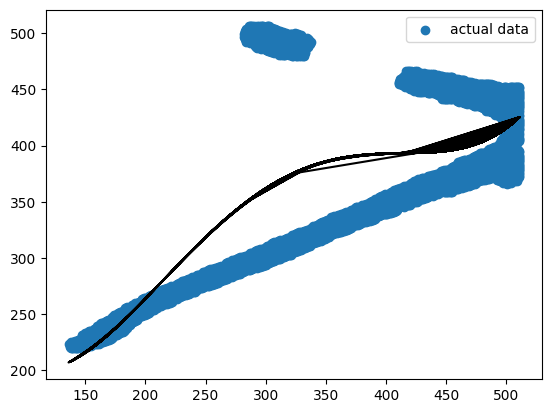

R_squared error for X = 0.4786373565271925


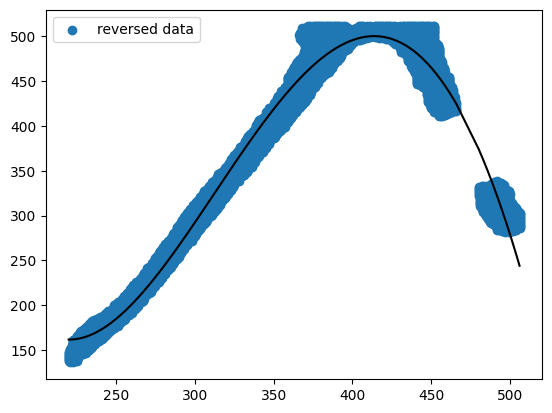

R_squared error for X_inversed = 0.9746461228634858
IMG NAME is 2020_KBK_310.jpg


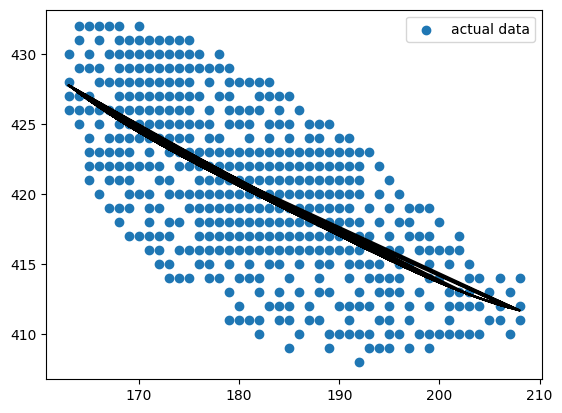

R_squared error for X = 0.43887742930304807


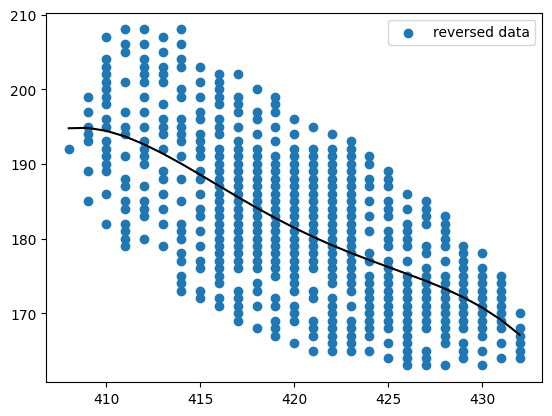

R_squared error for X_inversed = 0.43997519711154054
Only 1 clusters could be formed.
IMG NAME is 2020_KBK_890.jpg


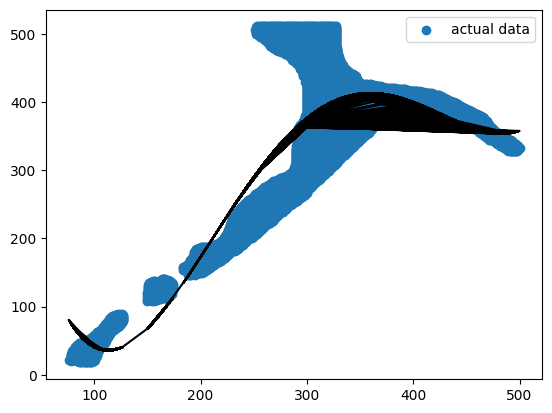

R_squared error for X = 0.6909323907653305


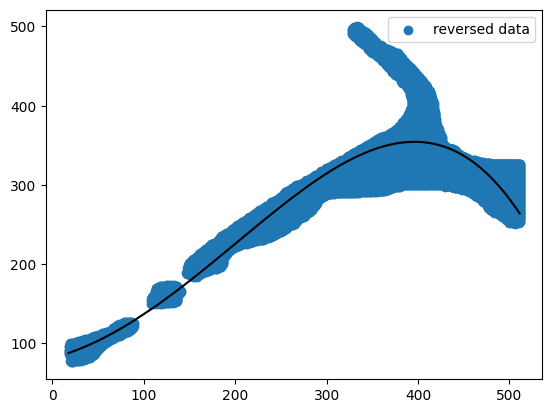

R_squared error for X_inversed = 0.7781810247415366
R_squared error = 0.7838570103561044
R_squared error = 0.05955659567914273
Remaining cluster centers = [[363.43259359 316.39557192]]
R_squared error = 0.6038379369532891
Remaining cluster centers = [[ 47.5529179  100.63501484]]


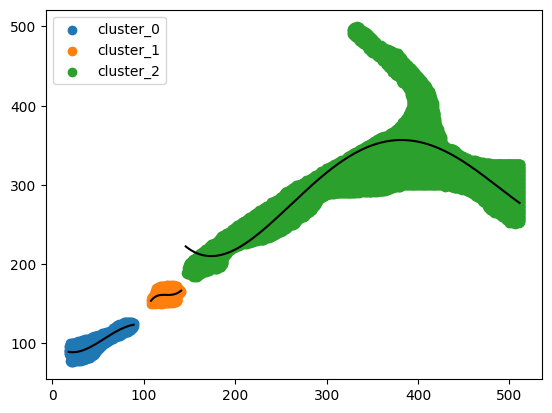

IMG NAME is 2020_KBK_660.jpg


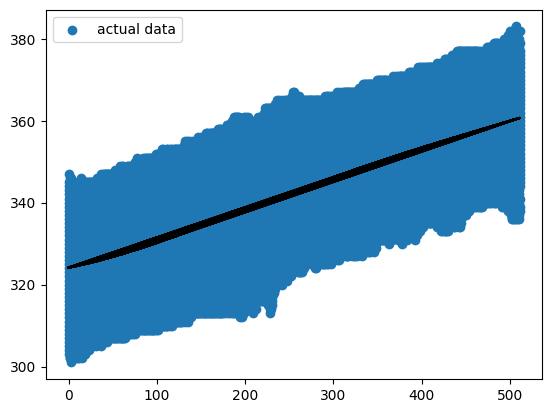

R_squared error for X = 0.46389265470921615


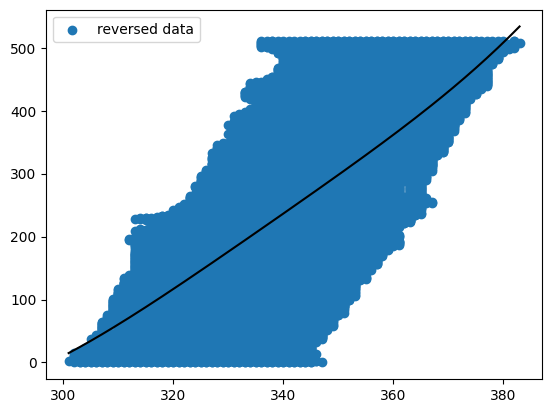

R_squared error for X_inversed = 0.46383709358241954
Only 1 clusters could be formed.
IMG NAME is 2020_KBK_700.jpg


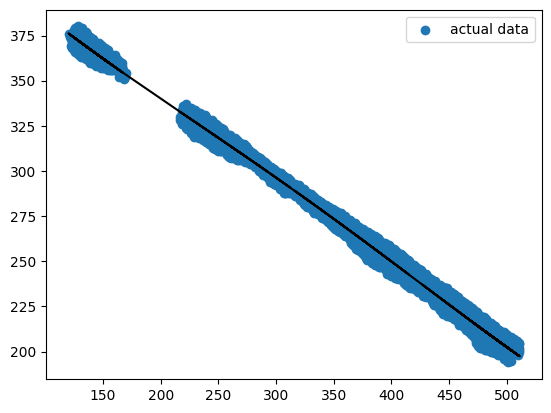

R_squared error for X = 0.9941973453470804


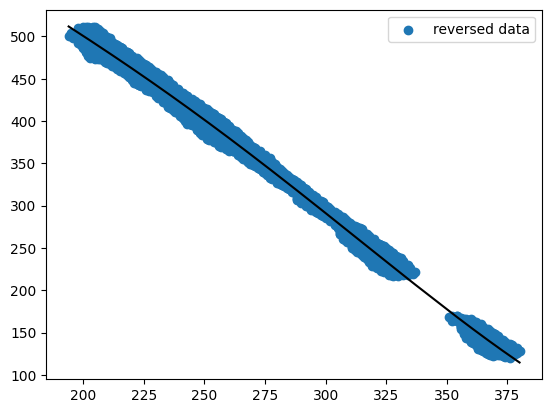

R_squared error for X_inversed = 0.9945153503276543
IMG NAME is 2020_KBK_270.jpg


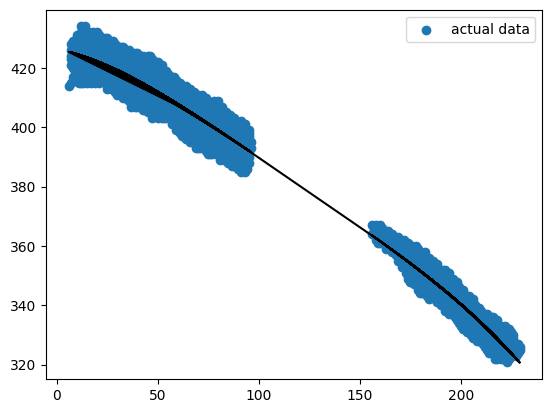

R_squared error for X = 0.9805012328643129


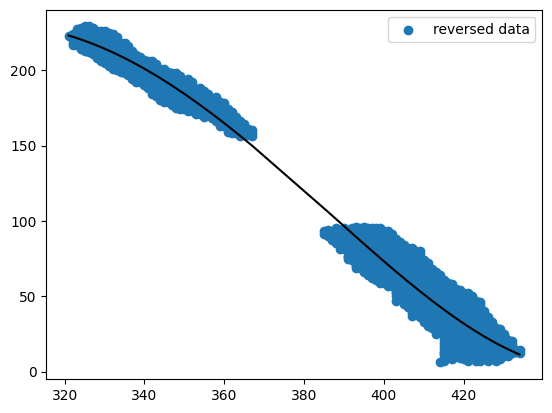

R_squared error for X_inversed = 0.9791815692974805
IMG NAME is 2020_KBK_265.jpg


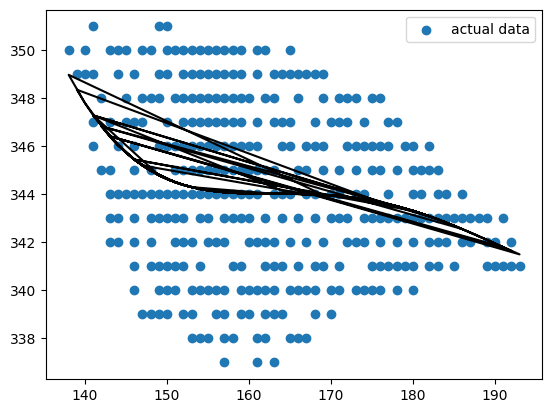

R_squared error for X = 0.08426189159377384


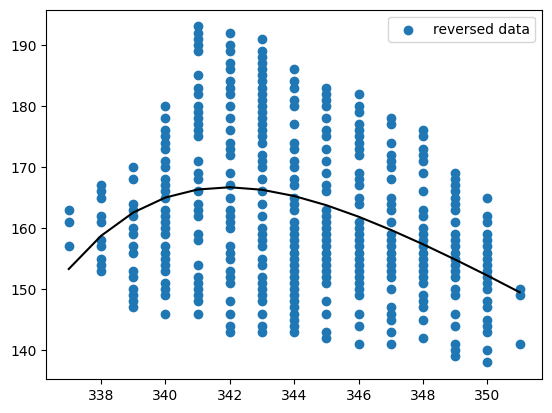

R_squared error for X_inversed = 0.13023860262873965
Only 1 clusters could be formed.
IMG NAME is 2020_KBK_715.jpg


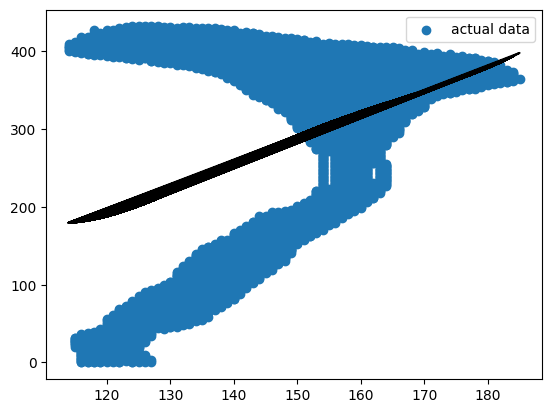

R_squared error for X = 0.16758584258830922


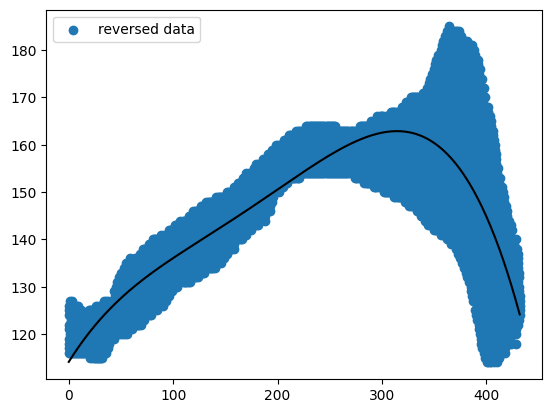

R_squared error for X_inversed = 0.59411913411732
Only 1 clusters could be formed.
IMG NAME is 2020_KBK_675.jpg


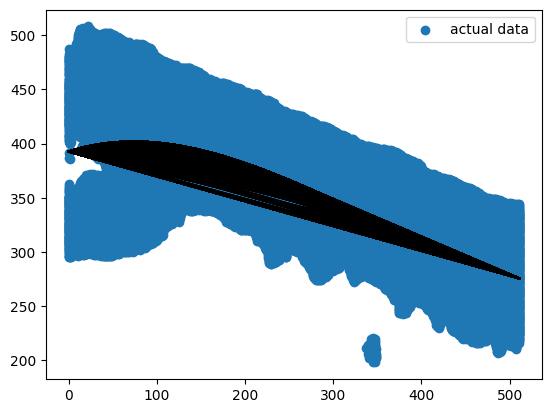

R_squared error for X = 0.4822670893659028


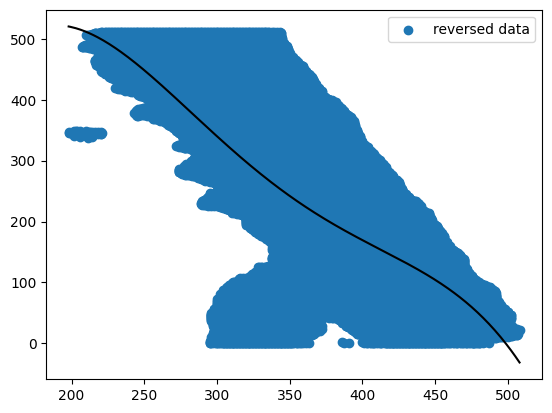

R_squared error for X_inversed = 0.46117234348671055
R_squared error = 0.12343582174863899
R_squared error = 0.462038895682531
IMG NAME is 2020_KBK_885.jpg


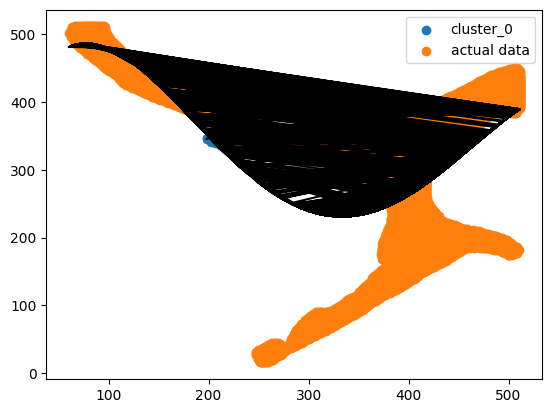

R_squared error for X = 0.4043575236665081


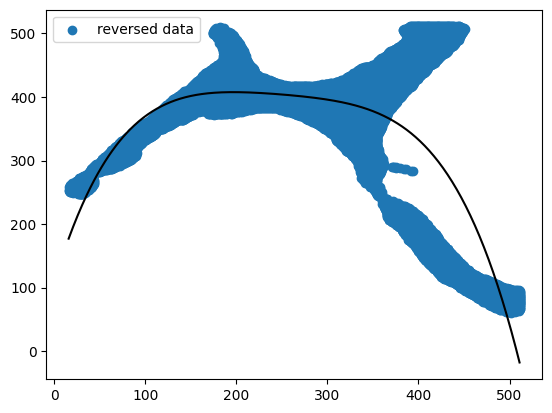

R_squared error for X_inversed = 0.44659261071569534
R_squared error = 0.0
R_squared error = 0.4465960897197384
IMG NAME is 2020_KBK_305.jpg


/var/folders/z8/jk8wslr51fb7ltc_q884vp7h0000gn/T/ipykernel_31171/2940916434.py:26: RankWarning: Polyfit may be poorly conditioned
  intersec_points = polyfit_data(X=X, X_inversed=X_inversed)


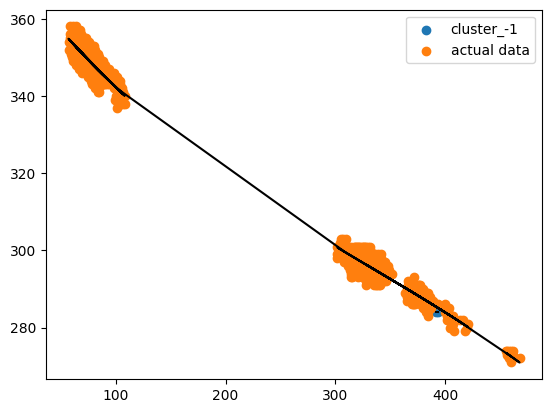

R_squared error for X = 0.9923373259103989


KeyboardInterrupt: 

In [11]:
for img_name in os.listdir(predicted_masks_dir) : 
    img_path = os.path.join(predicted_masks_dir, img_name)
    print(f"IMG NAME is {img_name}")
    binary_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # print(f"Shape is {binary_img.shape}")

    # Find the indices of the white pixels
    white_pixel_indices = np.where(binary_img == 255)
    # print(white_pixel_indices)
    
    # Extract x and y coordinates of the white pixels
    x_white = white_pixel_indices[1].reshape(-1, 1)
    y_white = white_pixel_indices[0].reshape(-1, 1)
    # print(x_white)
    

    # Combine the x and y coordinates into a single feature vector
    X = np.hstack((x_white, y_white))
    # print(f"X = {X}")
    if X.size == 0 : 
        continue
    X_inversed = np.hstack((y_white, x_white)) 
    # print(f"X_inversed = {X_inversed}")
    # print("Length of X:", len(X))

    intersec_points = polyfit_data(X=X, X_inversed=X_inversed)

    # for point in intersec_points : 
    #     x_white = np.append(x_white, np.array(point[0]))
    #     y_white = np.append(y_white, np.array(point[1]))

    # x_white = np.array(x_white).reshape(-1, 1)
    # y_white = np.array(y_white).reshape(-1, 1)
    # X = np.hstack((x_white, y_white))
    # print("Length of X:", len(X))

    # intersec_points = cluster_and_intersec_points(X=X, n_clusters=n_clusters)

In [ ]:
def polyfit_data(X=X, X_inversed=X) :
    print_bool = False  
    # just to show that swapping x and y gives a better result for fitting
    x_values = X[:, 0]
    y_values = X[:, 1]

    poly = np.polyfit(x_values, y_values, deg=4)

    y_fit = np.polyval(poly, x_values)

    plt.scatter(x_values, y_values, label="actual data")
    plt.plot(x_values, y_fit, color='black')
    plt.legend()
    plt.show()